In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
#Gradient Descent

In [3]:
cols=["a","b"]
data=pd.read_csv("data.csv", header=None, names=cols)

In [4]:
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
X= data.drop("b",axis=1)

In [6]:
y=data["b"]
y

0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: b, Length: 100, dtype: float64

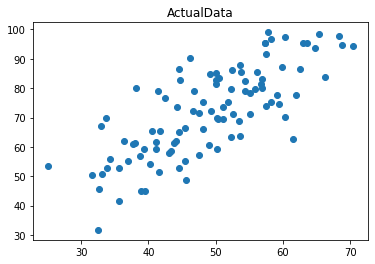

In [7]:
plt.scatter(X,y)
plt.title("ActualData")
plt.show()

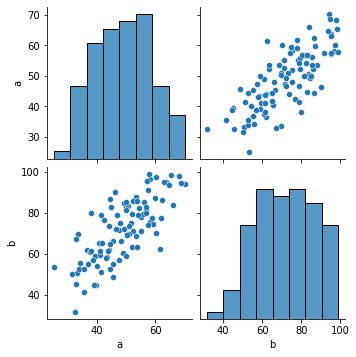

In [8]:
sns.pairplot(data)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [10]:
y_pred=lr.predict(X)
y_pred

array([52.40788911, 77.3646116 , 87.02976713, 70.26662354, 84.98171225,
       79.41056043, 75.91546535, 60.51497425, 71.017315  , 76.3188596 ,
       67.81452845, 78.46766268, 66.31687092, 83.02002477, 81.3010225 ,
       72.03212498, 66.94083103, 85.55912374, 68.05177388, 59.93919656,
       92.58713022, 91.66425642, 70.27326569, 63.22966312, 75.47820775,
       84.45407608, 81.9961259 , 89.51680102, 69.38638257, 73.94149373,
       75.93001564, 56.06411046, 64.25638517, 83.01533671, 82.2280406 ,
       67.83933743, 87.46613601, 53.11335843, 57.0995931 , 58.57812525,
       66.78388545, 65.3081199 , 73.36468391, 65.96688709, 88.77961285,
       52.60671136, 61.5494465 , 77.54145826, 54.03219894, 90.8187317 ,
       59.10788838, 66.72058817, 62.06545797, 63.4026457 , 74.57586355,
       79.33411692, 62.99360746, 88.17994029, 72.32791478, 62.66556407,
       62.76018251, 73.49975051, 76.1142292 , 73.43903702, 53.77038934,
       60.82309133, 80.58919275, 82.05820468, 85.52559385, 56.19

In [11]:
print("GD kullanmadan intercept is", lr.intercept_)
print("GD kullanmadan coefficent is", lr.coef_[0])

GD kullanmadan intercept is 13.642154681481571
GD kullanmadan coefficent is 1.1927057602312432


In [12]:
#with gradient descent

In [13]:
x2=data.iloc[:,0]
y2=data.iloc[:,1]

In [14]:
m=0   #intercepts
c=0   #coefficient

L=0.0001  #learning rate
epochs=1000  
n= float(len(x2))

for i in range(epochs):
    y_pred2=m*x2+c
    D_m=(-2/n)*sum(x2*(y2-y_pred2))
    D_c=(-2/n)*sum(y2-y_pred2)
    
    m= m- L*D_m
    c= c-L*D_c
print("GD ile intercept is", m)
print("GD ile coefficent is", c)

GD ile intercept is 1.4582620978635645
GD ile coefficent is 0.13106568099591231


------  Without Gradian Descent LR  ---------


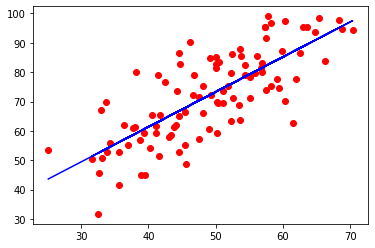

In [15]:
print("------  Without Gradian Descent LR  ---------")
plt.scatter(X,y,color="r")
plt.plot(X,lr.predict(X),color="blue")
plt.show()

------  With Gradian Descent LR  ---------


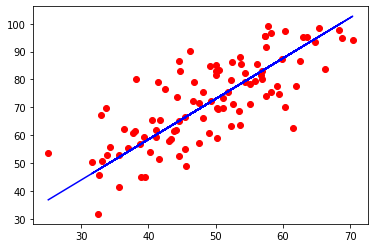

In [16]:
print("------  With Gradian Descent LR  ---------")
plt.scatter(x2,y2,color="r")
plt.plot(x2,y_pred2, color="blue")
plt.show()

## Classification

In [17]:
#Logistic Regression

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [20]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [21]:
X=dataset.drop(["Purchased","User ID","Gender"],axis=1)
y=dataset["Purchased"]

In [22]:
X.shape, y.shape

((400, 2), (400,))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [25]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(C=1.0) # regularization
classifier.fit(X_train,y_train)
LogisticRegression()

LogisticRegression()

In [26]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [27]:
calculation=pd.DataFrame(np.c_[y_test,y_pred],columns=["Original Purchased","Predicted Purchased"])
calculation

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


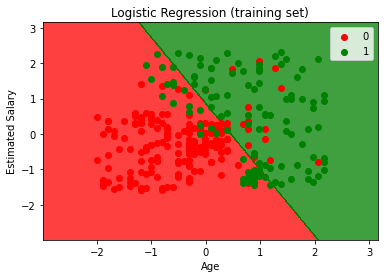

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [29]:
# confusion matrix(karmasıklık matrisi)

In [30]:
from sklearn.metrics import confusion_matrix


In [31]:
#Accuracy (basarım/dogruluk)
# accuracy= (TP+ TN)/(TP+FP+FN+TN)
#Precision(keskinlik)= TP/(TP+FP)
#Recall(Sensitivity, hatırlama ,hassasiyet)= TP/(TP+FN)


In [32]:
# SUPPORT VECTOR MACHİNES(SVM)

In [33]:
dataset=pd.read_csv("Social_Network_Ads.csv")
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=0)


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [36]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=0)
classifier.fit(X_train,y_train)



SVC(kernel='linear', random_state=0)

In [37]:
y_pred=classifier.predict(X_test)

In [38]:
cm=confusion_matrix(y_test,y_pred)

In [39]:
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


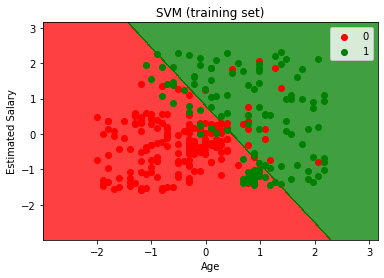

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()